In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Parent folder path containing subfolders
parent_folder_path = 'E:/Frankfurt University of Applied Sciences/Individual Project/Machine Learning/fft_data'

# Iterate through subfolders
for root, dirs, files in os.walk(parent_folder_path):
    for folder in dirs:
        current_folder_path = os.path.join(root, folder)

        # Create output folder structure if it doesn't exist
        output_folder = os.path.join(root.replace(parent_folder_path, 'spectrogram_plots'), folder)
        os.makedirs(output_folder, exist_ok=True)

        # Process each file in the current folder
        for file_name in os.listdir(current_folder_path):
            if file_name.endswith('.txt'):
                file_path = os.path.join(current_folder_path, file_name)
                signal_data = pd.read_csv(file_path, delimiter=None, header=None, sep='\s+', skiprows=1)
                df = pd.DataFrame(signal_data)

                # Calculate spectrogram parameters
                sampling_rate = 1.9e6  # Sampling rate in Hz (1.9 MHz)
                window_size = 1024
                overlap = 512

                # Plot and save individual spectrogram plots
                for i in range(df.shape[0]):
                    signal = df.iloc[i, 16:].values

                    # Plot spectrogram
                    fig, ax = plt.subplots(figsize=(8, 6))
                    spec, freqs, t, im = ax.specgram(signal, NFFT=window_size, Fs=sampling_rate, noverlap=overlap)
                    ax.set_xlabel('Time (s)')
                    ax.set_ylabel('Frequency (Hz)')
                    ax.set_title(f'Spectrogram {i+1}')
                    fig.colorbar(im, ax=ax, label='Intensity (dB)')
                    
                    current_time = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

                    # Save the plot
                    plot_name = os.path.join(output_folder, f'spectrogram_{i+1}_{current_time}.png')
                    plt.savefig(plot_name)
                    plt.close()  # Close the figure to release memory

print("Spectrogram plots saved successfully.")


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gaura\AppData\Local\Temp\ipykernel_11256\1886823241.py:23: SyntaxWarning: invalid escape sequence '\s'
  signal_data = pd.read_csv(file_path, delimiter=None, header=None, sep='\s+', skiprows=1)
C:\Users\gaura\AppData\Local\Temp\ipykernel_11256\1886823241.py:37: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=85).
  spec, freqs, t, im = ax.specgram(signal, NFFT=window_size, Fs=sampling_rate, noverlap=overlap)
C:\Users\gaura\AppData\Local\Temp\ipykernel_11256\1886823241.py:37: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=85).
  spec, freqs, t, im = ax.specgram(signal, NFFT=window_size, Fs=sampling_rate, noverlap=overlap)
C:\Users\gaura\AppData\Local\Temp\ipykernel_11256\1886823241.py:37: UserWarning: Only one segment is calculated since parameter NFFT (=1024) >= signal length (=85).
  spec

Spectrogram plots saved successfully.


In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Define paths to the directories where the images are stored
hard_dir = 'E:/Frankfurt University of Applied Sciences/Individual Project/Machine Learning/spectrogram_plots/Hard'
soft_dir = 'E:/Frankfurt University of Applied Sciences/Individual Project/Machine Learning/spectrogram_plots/Soft'

# Images are loaded from the directories, converted to arrays, and added to a list
# Corresponding labels ('Hard' for hard, 'Soft' for soft) are added to another list

# Load images and assign labels
images = []
labels = []

# Load hard images
for image_file in os.listdir(hard_dir):
    image = load_img(os.path.join(hard_dir, image_file), color_mode='grayscale', target_size=(150, 150))
    image = img_to_array(image)
    images.append(image)
    labels.append('Hard')  # Assign label 'Hard' to hard images

# Load soft images
for image_file in os.listdir(soft_dir):
    image = load_img(os.path.join(soft_dir, image_file), color_mode='grayscale', target_size=(150, 150))
    image = img_to_array(image)
    images.append(image)
    labels.append('Soft')  # Assign label 'Soft' to soft images

# Convert lists to arrays
images = np.array(images)
labels = np.array(labels)

# Normalize images
# The pixel values are divided by 255 to scale them between 0 and 1
images = images / 255.0

# Encode labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into training and validation sets
# 80% of the data is used for training and 20% for validation
x_train, x_val, y_train, y_val = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Define CNN model for binary image classification
model = Sequential()

# First conv block with 32 filters
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(150, 150, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv block with 64 filters
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third conv block with 128 filters
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth conv block with 256 filters
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert the 3D outputs to 1D vector
model.add(Flatten())

# Dense layer with 256 neurons
model.add(Dense(256, activation='relu'))

# Dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Output layer with 1 neuron (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile model with Adam optimizer
# The loss function is binary crossentropy and the metric is accuracy
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Define early stopping
# The training will stop if the validation loss does not improve after 3 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train model with a specified batch size and early stopping
# The model is trained for 10 epochs
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=64, callbacks=[early_stopping])

# Evaluate model on validation set
score = model.evaluate(x_val, y_val, verbose=0)

print('Test loss: Lower is better - ', score[0])
print('Test accuracy: Higher is better - ', score[1])


c:\Users\gaura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 964ms/step - accuracy: 0.4929 - loss: 0.7539 - val_accuracy: 0.5622 - val_loss: 0.6897
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 41s 948ms/step - accuracy: 0.5218 - loss: 0.6916 - val_accuracy: 0.7467 - val_loss: 0.6730
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 928ms/step - accuracy: 0.7146 - loss: 0.6066 - val_accuracy: 0.8975 - val_loss: 0.3567
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 930ms/step - accuracy: 0.8508 - loss: 0.3730 - val_accuracy: 0.9385 - val_loss: 0.1968
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 39s 919ms/step - accuracy: 0.9378 - loss: 0.1988 - val_accuracy: 0.9414 - val_loss: 0.2144
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 938ms/step - accuracy: 0.9519 - loss: 0.1627 - val_accuracy: 0.9546 - val_loss: 0.1424
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 931ms/step - accuracy: 0.9569 - loss: 0.1555 - val_accuracy: 0.9385 - val_loss: 0.1817
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 932ms/step - accuracy: 0.9513 - loss: 0.1578 - val_accu

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step


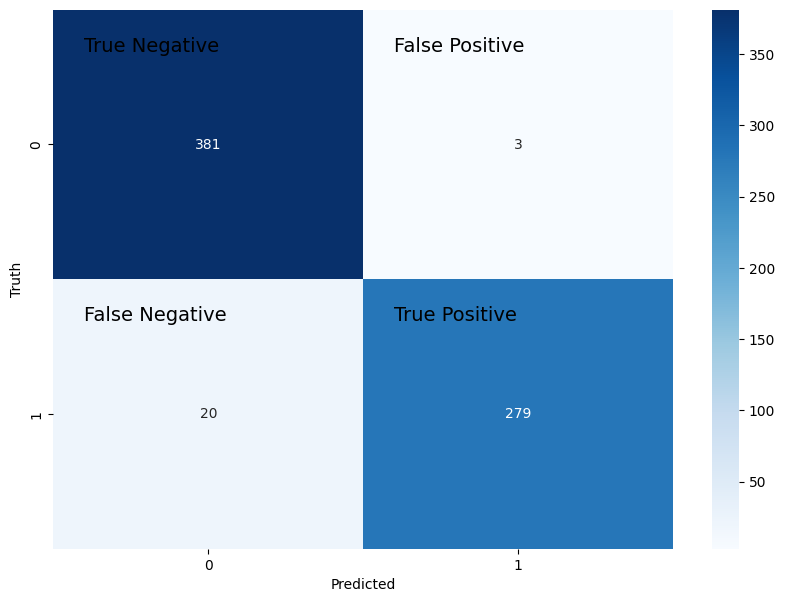

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_pred = (model.predict(x_val) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add labels to the plot
plt.text(0.1, 0.1, 'True Negative', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
plt.text(1.1, 0.1, 'False Positive', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
plt.text(0.1, 1.1, 'False Negative', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')
plt.text(1.1, 1.1, 'True Positive', horizontalalignment='left', verticalalignment='top', fontsize=14, color='black')

plt.show()

In [3]:
from sklearn.metrics import classification_report

# Predict classes
y_pred = (model.predict(x_val) > 0.5).astype("int32")

# Generate classification report
# 'Soft' corresponds to label 0 and 'Hard' corresponds to label 1
report = classification_report(y_val, y_pred, target_names=['Soft', 'Hard'])

print(report)

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step
              precision    recall  f1-score   support

    non-peak       0.95      0.99      0.97       384
        peak       0.99      0.93      0.96       299

    accuracy                           0.97       683
   macro avg       0.97      0.96      0.97       683
weighted avg       0.97      0.97      0.97       683

